<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A-Simple-Multiplexer-Example" data-toc-modified-id="A-Simple-Multiplexer-Example-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>A Simple Multiplexer Example</a></span></li></ul></div>

# A Simple Multiplexer Example

This example shows how to use the `myhdlpeek` module to monitor the inputs and output of a simple, two-input multiplexer.

t  z a b sel
1  3 2 3 False
2  1 6 1 False
3  2 0 2 False
4  2 2 4 1
5  1 6 1 0
6  4 4 1 1
7  2 2 7 1
8  1 6 1 0


<class 'myhdl.StopSimulation'>: No more events


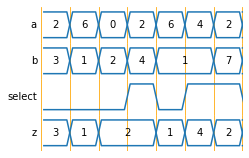

In [4]:
from myhdl import *
from myhdlpeek import *  # Import the myhdlpeeker module.

def mux(z, a, b, sel):
    """A simple multiplexer."""

    @always_comb
    def mux_logic():
        if sel == 1:
            z.next = a  # Signal a sent to mux output when sel is high.
        else:
            z.next = b  # Signal b sent to mux output when sel is low.
           
    return mux_logic

# Create some signals to attach to the multiplexer.
a, b, z = [Signal(0) for _ in range(3)]  # Integer signals for the inputs & output.
sel = Signal(bool(0))                    # Binary signal for the selector.

# Create some Peekers to monitor the multiplexer I/Os.
Peeker.clear()         # Clear any existing Peekers. (Start with a clean slate.)
Peeker(a, 'a')         # Add a Peeker to the a input.
Peeker(b, 'b')         # Add a Peeker to the b input.
Peeker(z, 'z')         # Add a peeker to the z output.
Peeker(sel, 'select')  # Add a Peeker to the select input. The Peeker label doesn't have to match the signal name.

# Instantiate mux.
mux_1 = mux(z, a, b, sel)

# Create a simple testbed to apply random patterns to the multiplexer.
from random import randrange
def test():
    '''Simple testbed generator that applies random inputs to the multiplexer.'''
    print("t  z a b sel")
    for _ in range(8):
        a.next, b.next, sel.next = randrange(8), randrange(8), randrange(2)
        yield delay(1)
        print("%d  %s %s %s %s" % (now(), z, a, b, sel))

# Simulate the multiplexer, testbed and the peekers.
sim = Simulation(mux_1, test(), *Peeker.instances()).run()

setup(use_jupyter=True, use_wavedrom=False)

# Display the complete waveforms captured by all the Peekers. 
# clear_traces()
show_waveforms()
